In [1]:
import numpy as np
import mlgrad.model as model
import mlgrad.loss as loss
import mlgrad.penalty as penalty
import mlgrad.pbsag as pbsag

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df = pd.read_csv("data/animals.dat", sep=',')
df

,name,body,brain
0,Mountain beaver,1.350,8.1
1,Cow,465.000,423.0
2,Grey wolf,36.330,119.5
3,Goat,27.660,115.0
4,Guinea pig,1.040,5.5
5,Dipliodocus,11700.000,50.0
6,Asian elephant,2547.000,4603.0
7,Donkey,187.100,419.0
8,Horse,521.000,655.0
9,Potar monkey,10.000,115.0


In [24]:
X = df["body"].values.reshape((-1,1))
X = np.asarray(X, "d")
Y = df["brain"].values

X = np.log(X)
Y = np.log(Y)

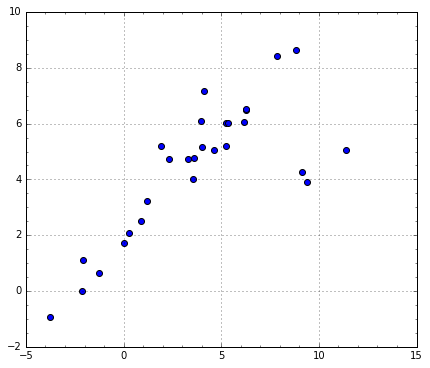

In [25]:
plt.figure(figsize=(7.0, 6.0))
plt.scatter(X, Y, s=36, c='b')
plt.minorticks_on()
plt.grid(1)
#plt.loglog()
plt.show()

In [26]:
loss_func = loss.SquareLoss()
loss_func

In [27]:
penalty_func = penalty.PowerPenalty(1.05)
penalty_func

In [28]:
param_init = np.random.random((2,))
lm_learn = model.LinearModel(param_init)

In [29]:
alg = pbsag.PbSAG(lm_learn, loss_func,  penalty_func, h=0.0005, tol=1.0e-4, max_epoch=2000, ls=0)
alg.fit(X, Y)
print("K:", alg.K, "hw:", alg.hw, "hs:", alg.hs, "s:", alg.s)

K: 414 hw: 0.0005 hs: 0.0005 s: 0.0790537853584646


In [30]:
lm_learn

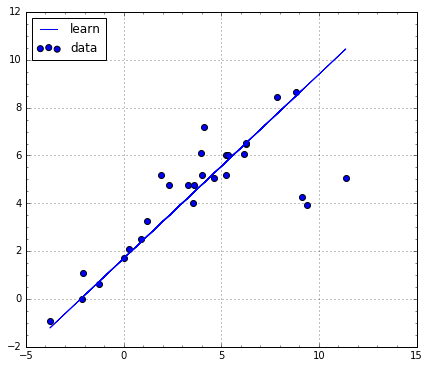

In [31]:
plt.figure(figsize=(7.0, 6.0))
plt.scatter(X, Y, s=36, c='b', label='data')
plt.plot(X, np.array([lm_learn.evaluate(x) for x in X]), label='learn')
plt.minorticks_on()
plt.grid(1)
plt.legend(loc='best')
plt.show()